# Auswertung der Rohdaten

Ergebnisse der Umfrage zum Klimaneutralen Stromsystem / Erneuerbaren Energiesystem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


Bad key text.latex.preview in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\

In [2]:
# Einstellungen zur Darstellung
# Farbpalette (kann später mit eigenen Farben angepasst werden)
# https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
cmap = cm.get_cmap('viridis')

In [3]:
# Gruppierung der Ergebnisse
links = ['E-Mailverteiler', 'internes-Netzwerk', 'Pressemitteilung']
states = ['vollständig', 'abgebrochen']
# Für Grafiken
nrows = len(states)
ncols = len(links)

In [4]:
# Laden der Umfrageergebnisse
# Funktion zum Bereinigen der Ergebnisse
def cleanse(df):
    mask = (df['duration']>0) \
        & (df['lastpage']>0) \
        & (df['dispcode'].isin([31,32,33,34,22]))
    return df.loc[mask]

# Funktion zum Laden, Filtern und Bereinigen der Daten
def load_df(link, skipped):
    df = pd.read_csv('data/2022_06_RLI_Klimaneutrales Stromsystem_{}_Ergebnisse.csv'.format(link),
                     sep=';', header=2, usecols=list(range(3,123)))
    df = cleanse(df)
    skip_codes = [22] if skipped else [31,32,33,34]
    return df.loc[df['dispcode'].isin(skip_codes)]

# Tabelle mit Datentabellen
data = pd.DataFrame(data={link: [load_df(link, skip) for skip in range(len(states))]
                          for link in links},
                    index=states)

# Access a DataFrame with df.loc[<vollständig/abgebrochen>, <Umfragelink-typ>]

In [8]:
# Importiere Codebook in dict format
from src import rls_umfrage_auswertung
codebook_dict = rls_umfrage_auswertung.main_preprocessing_codebook()

{4: {'columns': ['v_129', 'v_130', 'v_131'],
     'question': 'Welche drei zentralen Eigenschaften beschreiben aus Deiner '
                 'Sicht das „Klimaneutrale Stromsystem“? (q_47502 - Typ 143)'},
 5: {'question': 'Begriffe sind manchmal nicht eindeutig definiert. Auf das '
                 'klimaneutrale Stromsystem gibt es verschiedene Sichtweisen. '
                 'Was trifft aus Deiner Sicht zu?„Klimaneutrales Stromsystem“ '
                 'und „Erneuerbares Stromsystem“? sind ein Synonym. (q_47505 - '
                 'Typ 111)',
     'subquestion': {1: {'columns': 'v_137',
                         'multiple-choice-options': {'1': 'Ja',
                                                     '2': 'Eher ja',
                                                     '3': 'Eher nein',
                                                     '4': 'Nein'},
                         'question': 'Synonyme KS & ES'}}},
 6: {'columns': 'v_138',
     'question': 'Was ist der Unterschied zwisc

## Generelle Angaben zu den Ergebnisgruppen

In [5]:
print('Anzahl der Antworten je Gruppe')
for l in links:
    for s in states:
        print('{}; {}: {}'.format(l,s,len(data.loc[s,l])))

Anzahl der Antworten je Gruppe
E-Mailverteiler; vollständig: 64
E-Mailverteiler; abgebrochen: 33
internes-Netzwerk; vollständig: 36
internes-Netzwerk; abgebrochen: 17
Pressemitteilung; vollständig: 31
Pressemitteilung; abgebrochen: 17


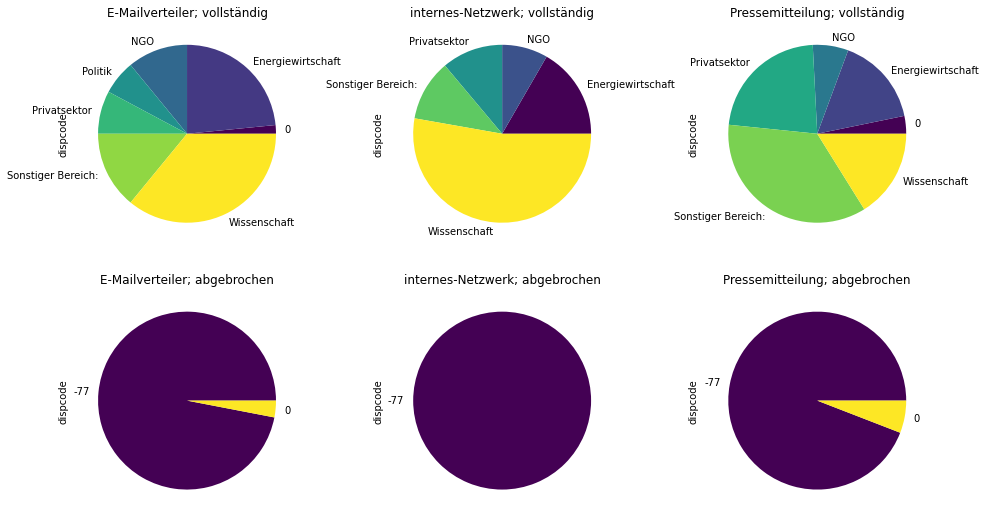

In [15]:
fig, ax = plt.subplots(nrows, ncols, figsize=(16,9))
for i in range(nrows):
    for j in range(ncols):
        data.iloc[i,j]['v_296'] = data.iloc[i,j]['v_296'].astype(str).replace(
            codebook_dict[40]['subquestion'][1]['multiple-choice-options'],
        )
        data.iloc[i,j].groupby('v_296').count()['dispcode'].plot.pie(ax=ax[i,j], cmap=cmap)
        ax[i,j].set_title(links[j] + '; ' + states[i])

In [7]:
print('Average years of experience:')
for l in links:
    for s in states:
        print('{}; {}: {}'.format(l,s, np.round(data.loc[s,l].loc[
            data.loc[s,l]['v_306']>-77, 'v_306'].mean(),
                                                1)))

Average years of experience:
E-Mailverteiler; vollständig: 12.1
E-Mailverteiler; abgebrochen: nan
internes-Netzwerk; vollständig: 10.7
internes-Netzwerk; abgebrochen: nan
Pressemitteilung; vollständig: 17.1
Pressemitteilung; abgebrochen: nan


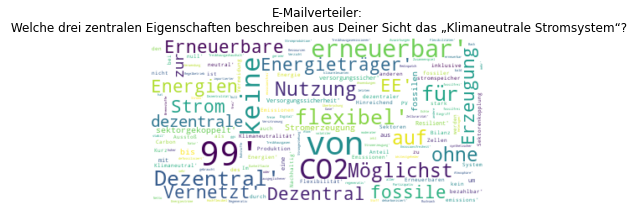

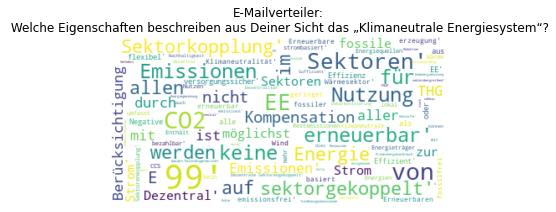

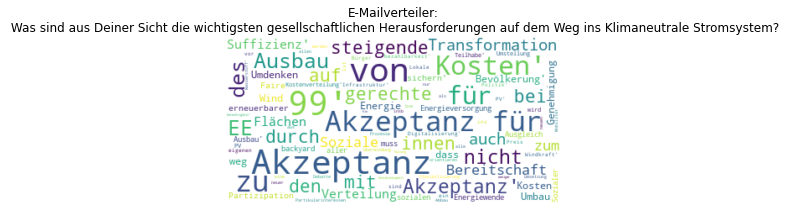

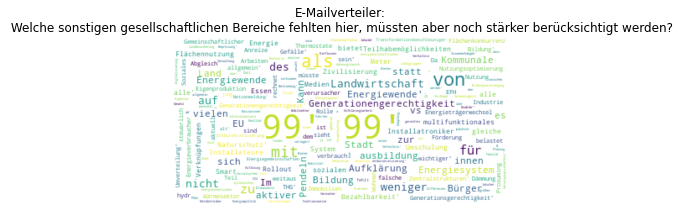

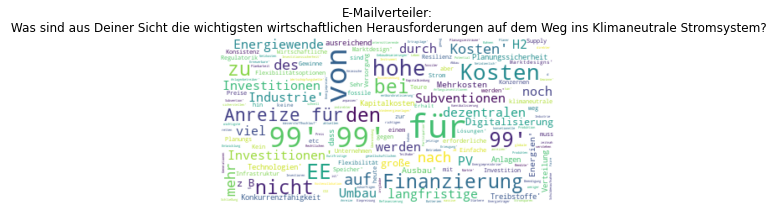

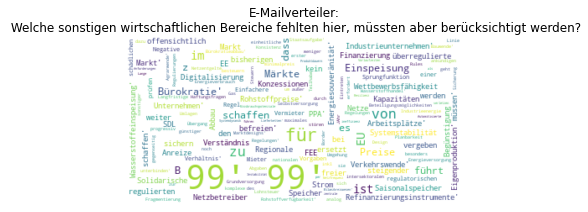

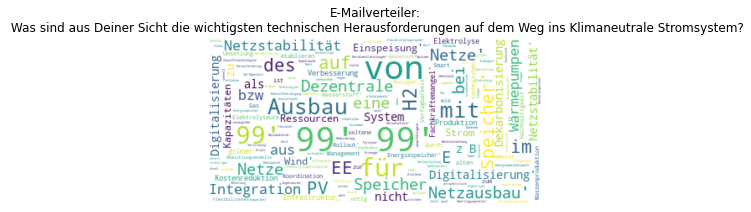

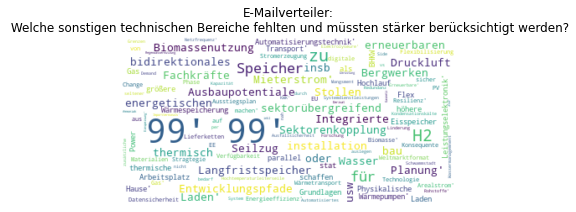

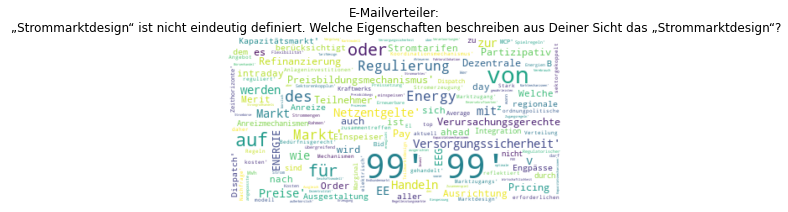

[]

In [8]:
# Erzeuge eine WordCloud für alle Fragen mit drei Antwortmöglichkeiten:
rls_umfrage_auswertung.create_wordclouds(codebook_dict, data.loc[states[0], links[0]], links[0])